In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
data = pd.read_csv("data/listings_clean.csv", index_col=0)

In [151]:
price_stats = {
    "count": data["price"].count(),
    "mean": data["price"].mean(),
    "median": data["price"].median(),
    "min": data["price"].min(),
    "max": data["price"].max(),
    "std": data["price"].std(),
    "q1": data["price"].quantile(0.25),
    "q3": data["price"].quantile(0.75),
    "IQR": data["price"].quantile(0.75) - data["price"].quantile(0.25)
}

price_stats

{'count': np.int64(62684),
 'mean': np.float64(213.36605832429328),
 'median': np.float64(135.0),
 'min': np.float64(6.0),
 'max': np.float64(74100.0),
 'std': np.float64(860.901556534754),
 'q1': np.float64(75.0),
 'q3': np.float64(225.0),
 'IQR': np.float64(150.0)}

<Axes: xlabel='price', ylabel='Count'>

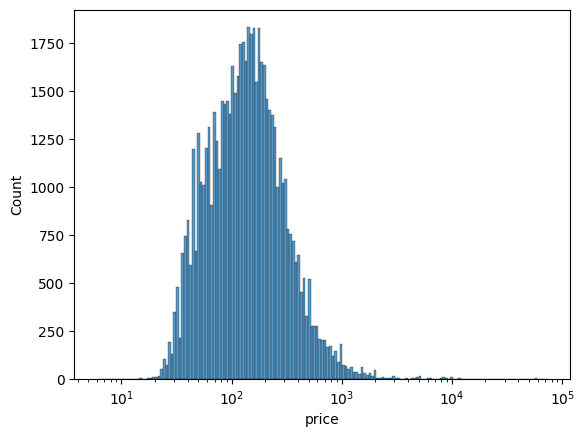

In [152]:
sns.histplot(data["price"], log_scale=True)

In [153]:
upper_fence = price_stats["q3"] + 1.5 * price_stats["IQR"]
lower_fence = price_stats["q1"] - 1.5 * price_stats["IQR"]

print(f"Upper fence: {upper_fence} | Lower fence: {lower_fence}")

Upper fence: 450.0 | Lower fence: -150.0


In [154]:
upper_outliers = data[data["price"] > upper_fence]
lower_outliers = data[data["price"] < lower_fence]

outliers = pd.concat([upper_outliers, lower_outliers])

outlier_pct = outliers.shape[0] / data.shape[0]
upper_outlier_pct = upper_outliers.shape[0] / data.shape[0]
lower_outlier_pct = lower_outliers.shape[0] / data.shape[0]

print(f"Percentage of Outliers: {outlier_pct:.2%}")
print(f"{upper_outlier_pct:.2%} above upper fence.")
print(f"{lower_outlier_pct:.2%} below the lower fence.")

Percentage of Outliers: 6.69%
6.69% above upper fence.
0.00% below the lower fence.


In [155]:
filtered_data = data[(data.price >= lower_fence) & (data.price <= upper_fence)]

Text(0.5, 1.0, 'Log Scale')

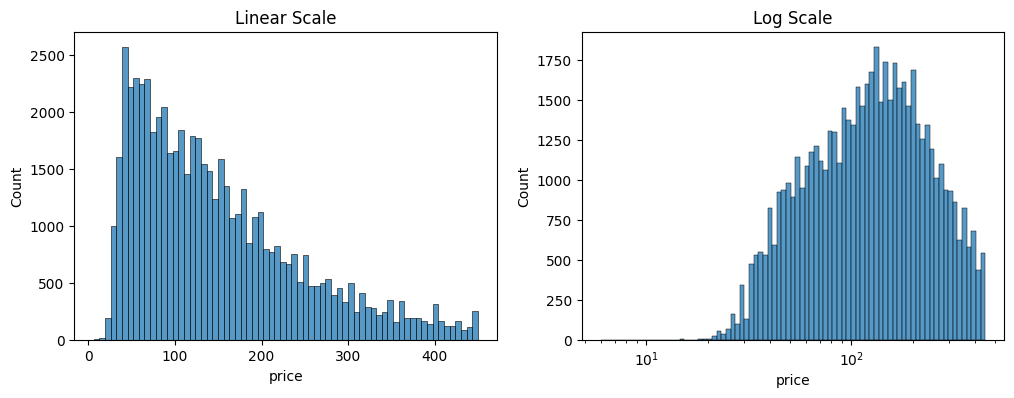

In [156]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(filtered_data["price"], log_scale=False, ax=ax[0])
ax[0].set_title("Linear Scale")
sns.histplot(filtered_data["price"], log_scale=True, ax=ax[1])
ax[1].set_title("Log Scale")

In [157]:
filtered_data["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [158]:
room_types = filtered_data.groupby("room_type")

entire_home = room_types.get_group("Entire home/apt")
priv_room = room_types.get_group("Private room")
hotel_room = room_types.get_group("Hotel room")
shared_room = room_types.get_group("Shared room")

<Axes: >

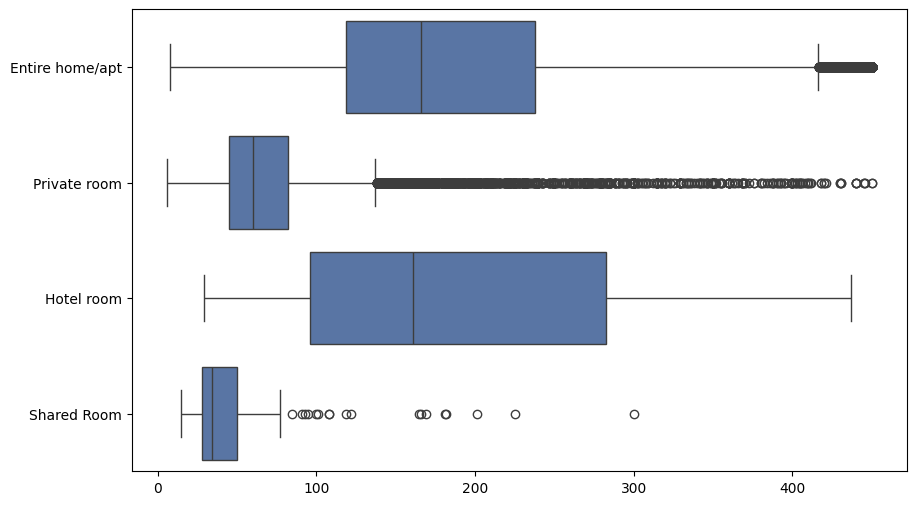

In [159]:
room_types_price = pd.DataFrame(
    {
        "Entire home/apt": entire_home["price"],
        "Private room": priv_room["price"],
        "Hotel room": hotel_room["price"],
        "Shared Room": shared_room["price"]
    }
)

plt.figure(figsize=(10, 6))
sns.boxplot(room_types_price, orient="h", color="#4C72B0")


In [160]:
top_8_neighbourhoods = filtered_data["neighbourhood"].value_counts().sort_values(ascending=False).head(8).index.tolist()
top_8_neighbourhoods_df = filtered_data[filtered_data["neighbourhood"].isin(top_8_neighbourhoods)]

<Axes: xlabel='Price', ylabel='Neighbourhoods'>

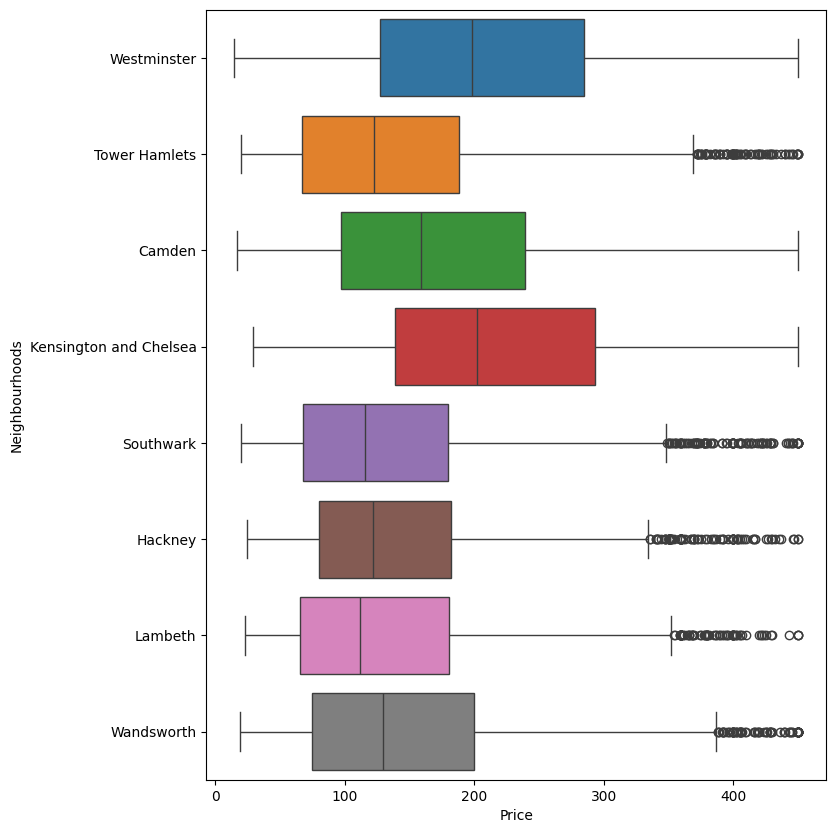

In [161]:
neighbourhoods_group = top_8_neighbourhoods_df.groupby("neighbourhood")

neighbourhoods = {}

for neighbourhood in top_8_neighbourhoods:
    neighbourhoods[neighbourhood] = neighbourhoods_group.get_group(neighbourhood)["price"]

plt.figure(figsize=(8, 10))
plt.xlabel("Price")
plt.ylabel("Neighbourhoods")
sns.boxplot(pd.DataFrame(neighbourhoods), orient="h")


In [162]:
corr_matrix_data = data[["price", "reviews_per_month", "days_since_review", "availability_365", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]]
corr_matrix_data.corr(method="pearson")

price  reviews_per_month  \
price                           1.000000          -0.026220   
reviews_per_month              -0.026220           1.000000   
days_since_review               0.027936          -0.316487   
availability_365                0.034486          -0.091582   
minimum_nights                  0.006820          -0.082365   
number_of_reviews              -0.022809           0.551631   
calculated_host_listings_count  0.059384          -0.072470   

                                days_since_review  availability_365  \
price                                    0.027936          0.034486   
reviews_per_month                       -0.316487         -0.091582   
days_since_review                        1.000000          0.046305   
availability_365                         0.046305          1.000000   
minimum_nights                           0.111973          0.043297   
number_of_reviews                       -0.135355         -0.071843   
calculated_host_listings_count           0.003203          0.094025   

                                minimum_nights  number_of_reviews  \
price                                 0.006820          -0.022809   
reviews_per_month                    -0.082365           0.551631   
days_since_review                     0.111973          -0.135355   
availability_365                      0.043297          -0.071843   
minimum_nights                        1.000000          -0.045397   
number_of_reviews                    -0.045397           1.000000   
calculated_host_listings_count        0.057828          -0.076204   

                                calculated_host_listings_count  
price                                                 0.059384  
reviews_per_month                                    -0.072470  
days_since_review                                     0.003203  
availability_365                                      0.094025  
minimum_nights                                        0.057828  
number_of_reviews                                    -0.076204  
calculated_host_listings_count                        1.000000

<Axes: >

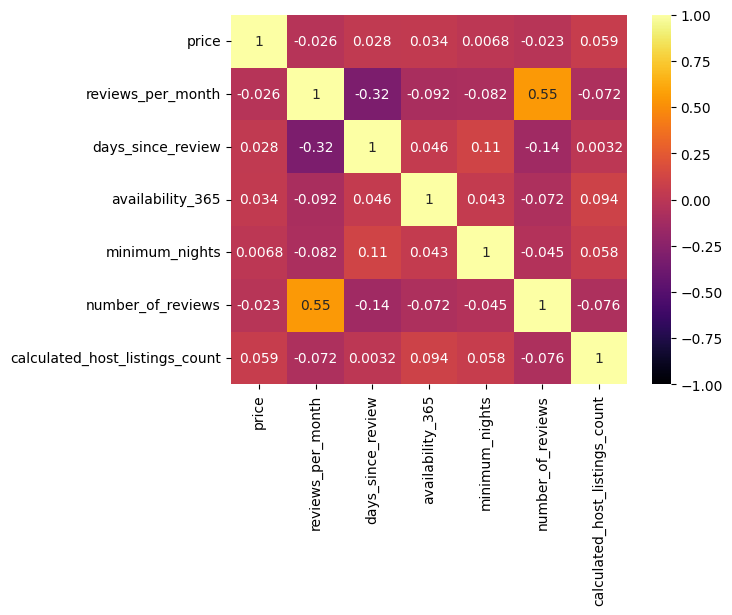

In [163]:
sns.heatmap(corr_matrix_data.corr(), annot=True, cmap="inferno", vmin=-1, vmax=1)

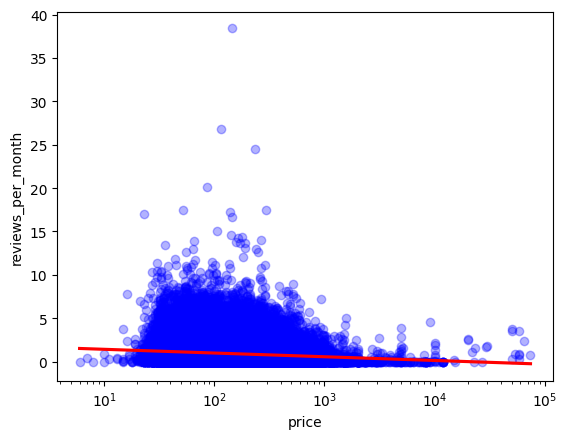

In [164]:
sns.regplot(
    data=data,
    x="price",
    y="reviews_per_month",
    logx=True,
    scatter_kws={"color": "blue", "alpha": 0.3},
    line_kws={"color": "red"}
)

plt.xscale("log")
plt.show()

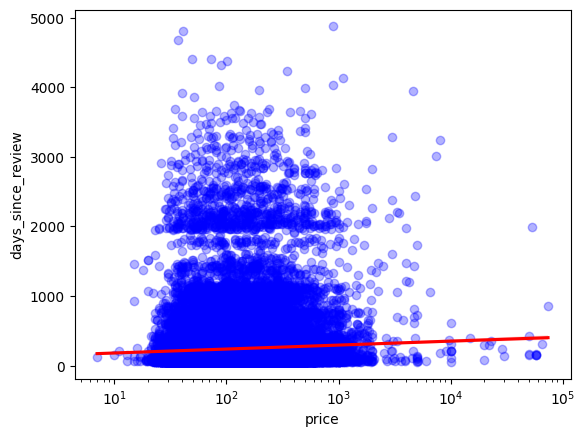

In [165]:
sns.regplot(
    data=data,
    x="price",
    y="days_since_review",
    logx=True,
    scatter_kws={"color": "blue", "alpha": 0.3},
    line_kws={"color": "red"}
)

plt.xscale("log")
plt.show()

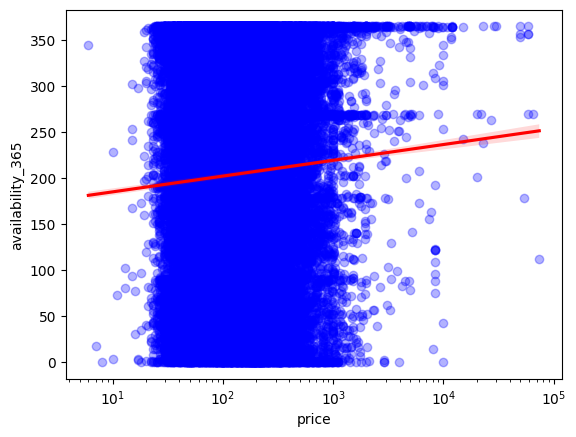

In [166]:
sns.regplot(
    data=data,
    x="price",
    y="availability_365",
    logx=True,
    scatter_kws={"color": "blue", "alpha": 0.3},
    line_kws={"color": "red"}
)

plt.xscale("log")
plt.show()

In [167]:
import geopandas as gpd
import folium

In [168]:
geo_data = gpd.read_file("data/London_Boroughs.gpkg")

In [169]:
geo_data["name"].unique()

array(['Kingston upon Thames', 'Croydon', 'Bromley', 'Hounslow', 'Ealing',
       'Havering', 'Hillingdon', 'Harrow', 'Brent', 'Barnet', 'Lewisham',
       'Greenwich', 'Bexley', 'Enfield', 'Waltham Forest', 'Lambeth',
       'Redbridge', 'Sutton', 'Richmond upon Thames', 'Merton',
       'Wandsworth', 'Hammersmith and Fulham', 'Southwark',
       'Kensington and Chelsea', 'City of London', 'Westminster',
       'Camden', 'Tower Hamlets', 'Islington', 'Hackney', 'Haringey',
       'Newham', 'Barking and Dagenham'], dtype=object)

In [170]:
data["neighbourhood"].unique()

array(['Lewisham', 'Camden', 'Lambeth', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Ealing', 'Hackney',
       'Greenwich', 'Waltham Forest', 'Hillingdon', 'Haringey',
       'Barking and Dagenham', 'Merton', 'Wandsworth',
       'Kensington and Chelsea', 'Islington', 'Barnet', 'Croydon',
       'City of London', 'Westminster', 'Brent', 'Newham',
       'Tower Hamlets', 'Redbridge', 'Southwark', 'Havering', 'Enfield',
       'Kingston upon Thames', 'Bromley', 'Bexley', 'Sutton', 'Harrow'],
      dtype=object)

In [171]:
set(data["neighbourhood"].unique()) == set(geo_data["name"].unique())

True

In [172]:
borough_group = data.groupby("neighbourhood")
borough_median_price = {borough: borough_group.get_group(borough)["price"].median() for borough in data["neighbourhood"].unique()}

In [173]:
borough_median_df = pd.DataFrame(list(borough_median_price.items()), columns=["neighbourhood", "median_price"])

In [174]:
merged_data = geo_data.merge(borough_median_df, left_on="name", right_on="neighbourhood", how="left").drop("neighbourhood", axis=1)

In [175]:
merged_data.head(5)

objectid                  name   gss_code   hectares  nonld_area ons_inner  \
0         1  Kingston upon Thames  E09000021   3726.117       0.000         F   
1         2               Croydon  E09000008   8649.441       0.000         F   
2         3               Bromley  E09000006  15013.487       0.000         F   
3         4              Hounslow  E09000018   5658.541      60.755         F   
4         5                Ealing  E09000009   5554.428       0.000         F   

  sub_2011                                           geometry  median_price  
0    South  POLYGON ((516401.6 160201.8, 516407.3 160210.5...          90.0  
1    South  POLYGON ((535009.2 159504.7, 535005.5 159502, ...          75.0  
2    South  POLYGON ((540373.6 157530.4, 540361.2 157551.9...          87.0  
3     West  POLYGON ((509703.4 175356.6, 509712.6 175361.8...          99.0  
4     West  POLYGON ((515647.2 178787.8, 515608.8 178787.3...          90.0

In [189]:
m = folium.Map(location=(51.5074, -0.1278), zoom_start=11, tiles="cartodb positron")
folium.Choropleth(geo_data=geo_data, data=merged_data, columns=["name", "median_price"], key_on="feature.properties.name").add_to(m)
folium.GeoJson(merged_data, 
               name="Tooltip", 
               style_function=lambda feature: {
                   "fillColor": "transparent",
                   "color": "black",
                   "weight": 0.5
               },
               tooltip=folium.GeoJsonTooltip(
                   fields=["name", "median_price"],
                   aliases=["Name", "Median Price (£)"],
                   localize=True,
                   sticky=False,
                   labels=True,
                   style=(
                       "background-color: white; "
                       "border: 1px solid black; "
                       "border-radius: 3px; "
                       "padding: 5px; "
                   )
               )
            ).add_to(m)

In [190]:
m